# Домашнее задание № 4

## по дисциплине: Введение в математический анализ

## Тема: Функции повторение

### выполнил: Евгений Кириллов

### Распределения

1. Какой функции соответствует плотность непрерывного равномерного распределения?

#### ответ: константе

2. Пусть человек заходит на ж/д платформу в произвольный момент времени от 0 до 30 минут. Поезд отходит каждые 30 минут.
Как посчитать вероятность того, что человеку придется ждать более 10 минут?

#### ответ: если человек пришёл на платформу в промежуток от 0 (включительно) до 20 мин. (исключительно), то ему придётся ждать более 10 мин., соответственно 20/30 или 2/3 будет вероятность того, что человеку придется ждать более 10 мин.

3. Каким величинам в реальной жизни соответствует нормальное распределение?

#### ответ: рост, вес людей в популяции  при определённом возрасте, отклонения при стрельбе, количество пассажиров метро в день в каком-то месяце и т.д.

4. Пусть функция плотности нормальной случайной величины имеет следующий вид (1 / (4 sqrt(2pi))) * (exp(-(x+2)**2) / 32).
Найдите параметры матожидания и дисперсии из этой формулы

#### нарисуем график распределения вероятностей

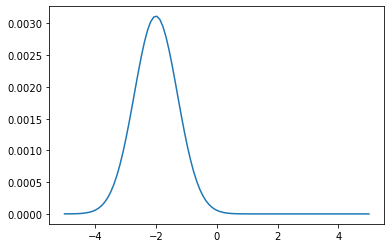

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, 100)
y = [(1 / (4 * math.sqrt(2 * math.pi))) * (math.exp(-(i + 2)**2) / 32) for i in x]

plt.plot(x, y)
plt.show()

#### как видно, матожидание находится около -2

In [2]:
expectation = x[y.index(max(y))]
expectation

-1.9696969696969697

#### если матожидание можно увидеть на графике, то как дисперсию находить из функции - не понял!

5. На kaggle есть данные о росте 25000 18-летних людей
https://www.kaggle.com/c/2402-heights-and-weights-dataset/data?select=train.csv 
(train датасет)

1) Постройте гистограмму роста 

2) Посчитайте среднее и отклонение

3) Возьмите нормальное распределение с этими параметрами и нарисуйте его на том же графике

4) Убедитесь, что оно визуально аппроксимирует график гистограммы


In [3]:
import numpy as np
import pandas as pd


DATASET_PATH = 'HW_4_task_5_dataset.csv'
df = pd.read_csv(DATASET_PATH)

df

,Id,height,weight
0,1,70.49366,129.3840
1,2,65.23482,104.5786
2,3,67.59619,131.7669
3,4,68.51919,135.0276
4,5,67.07600,118.4065
...,...,...,...
19995,19996,66.69938,126.4284
19996,19997,70.60422,133.7741
19997,19998,67.57167,127.7977
19998,19999,69.83352,124.5901


In [4]:
height = df['height'].sort_values()

In [5]:
height.head(3)

13350    60.61265
4470     60.80620
16656    61.30021
Name: height, dtype: float64

In [6]:
height.tail(3)

10511    74.74047
13655    75.11519
18011    75.15280
Name: height, dtype: float64

#### гистограмма роста

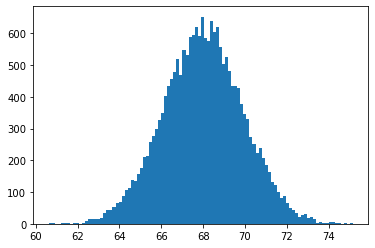

In [7]:
import matplotlib.pyplot as plt


plt.hist(height, bins=100)

plt.show()

#### среднее

In [8]:
height.mean()

67.99522718899979

#### дисперсия

In [9]:
sum((height - height.mean()) ** 2) / height.shape[0]

3.6058849497136443

#### среднеквадратическое отклонение

In [10]:
import math


math.sqrt(sum((height - height.mean()) ** 2) / height.shape[0])

1.8989167832513474

#### то же самое, но штатной функцией

In [11]:
np.std(height)

1.8989167832513474

#### нормальное распределение

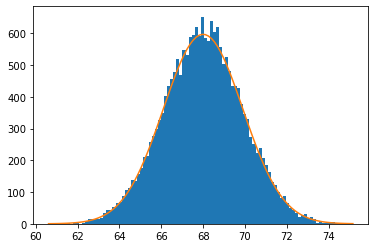

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt


mean = height.mean()
std = np.std(height)

x = np.linspace(min(height), max(height), 100)
y = [((np.pi * std) * np.exp(-0.5 * ((i - mean) / std) ** 2)) for i in x]
y = [i * 100 for i in y]

plt.hist(height, bins=100)
plt.plot(x, y)

plt.show()

### Линейная регрессия

X- уровень месячной зарплаты

Y- число уволившихся сотрудников

X 100 150 200 250 300

Y 60 35 20 20 15

Найти уравнение линейной регрессии Y на X  (вручную или используя встроенные библиотеки)

Предскажите значение при X=310

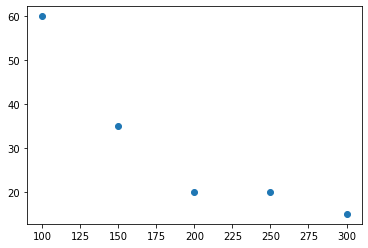

In [13]:
import matplotlib.pyplot as plt


x = [100, 150, 200, 250, 300]
y = [60, 35, 20, 20, 15]

plt.scatter(x, y)

plt.show()

In [14]:
x_mean = np.array(x).mean()
x_mean

200.0

In [15]:
y_mean = np.array(y).mean()
y_mean

30.0

In [16]:
sum_of_all_x_and_y_multiplications = sum([i * ii for i, ii in zip(x, y)])
sum_of_all_x_and_y_multiplications

24750

In [17]:
sum_of_all_x_in_pow_2 = sum([i ** 2 for i in x])
sum_of_all_x_in_pow_2

225000

In [18]:
alpha = (sum_of_all_x_and_y_multiplications - len(x) * x_mean * y_mean) / (sum_of_all_x_in_pow_2 - len(x) * x_mean ** 2)
alpha

-0.21

In [19]:
beta = y_mean - alpha * x_mean
beta

72.0

#### ответ: y = (-0.21) * x + 72

#### значение при X=310

In [20]:
y = (-0.21) * 310 + 72
y

6.900000000000006

#### изобразим графически линейную регрессию

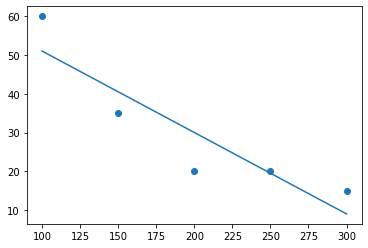

In [21]:
import matplotlib.pyplot as plt
import numpy as np


x = [100, 150, 200, 250, 300]
y = [60, 35, 20, 20, 15]

x_ = np.linspace(100, 300, 100)
y_ = [((-0.21) * i + 72) for i in x_]

plt.scatter(x, y)
plt.plot(x_, y_)

plt.show()

### Логистическая регрессия

Какая функция лежит в основе модели логистической регресии?

#### ответ: сигмойд

Как перевести вещественные числа в значения на отрезке от 0 до 1 ?

#### ответ: через функцию $$f(z) = \frac{1}{1+e^{-z}}$$

X- время сколько студент потратил на обучение

Y- сдал или нет экзамен (1 или 0)

X 0.5 0.7 1 1.25 1.75 2.5 2.75 3.5 4 4.5 5 5.5 6 7 8 

Y  0   0  0  0     1   0    1   0  1  1  1  1  1 1 1

Построить уравнение логистической регрессии в общем виде с неизвестными коэффициентами.
Найти коэффициенты используя Python

In [22]:
from sklearn.linear_model import LogisticRegression
import pandas as pd


X = pd.DataFrame([0.5, 0.7, 1, 1.25, 1.75, 2.5, 2.75, 3.5, 4, 4.5, 5, 5.5, 6, 7, 8])
y = [0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]

model = LogisticRegression()
clf = model.fit(X, y)
print(clf.coef_[0][0])
print(clf.intercept_[0])

0.9955699075004757
-2.6540909229690115


#### ответ:

$$Y = \frac{1}{1+e^{-(-2.65409092 + 0.99556991 * X)}}$$

Зная коэффициенты, чему согласно логистической регрессии будет количественно равна вероятность сдать экзамен, если
студент потратил 2 часа? 3 часа?

P(X=2)= ?

P(X=3)= ?

In [23]:
import math


X = 2
print(f'P(X={X})={1 / (1 + math.exp(-(-2.65409092 + 0.99556991 * X)))}')

X = 3
print(f'P(X={X})={1 / (1 + math.exp(-(-2.65409092 + 0.99556991 * X)))}')

P(X=2)=0.3400769997733019
P(X=3)=0.5823964368893032


#### предскажем используя штатные функции

In [24]:
clf.predict(pd.DataFrame([2])), clf.predict(pd.DataFrame([3]))

(array([0]), array([1]))

In [25]:
clf.predict_proba(pd.DataFrame([2])), clf.predict_proba(pd.DataFrame([3]))

(array([[0.659923, 0.340077]]), array([[0.41760357, 0.58239643]]))

### Нейросети

1. Пусть есть простейшая нейросеть с одним слоем, результат активации нейронов на выходном уровне зависит от
активации нейронов на первом уровне по формуле 

$$a^{(1)}=\sigma(wa^{(0)}+b)$$

Предположим, что мы хотим настроить нейросеть так, чтобы она работала как функция NOT, то есть при значении нейрона a0=0 
она бы получала на a(1) значение 1, и наоборот. 

In [26]:
# First we set the state of the network
import numpy as np
σ = np.tanh
w1 = 1.3
b1 = -0.1
# Then we define the neuron activation.
def a1(a0) :
  return σ(w1 * a0 + b1)
  
# Finally let's try the network out!
# Replace x with 0 or 1 below,
a1(0)

-0.09966799462495582

Поэксперементируйте с разными a0, a1 и подберите такие хорошие значения a0 и a1, чтобы нейросеть работала бы близко
к тому, как работает функция NOT, то есть переводила бы a0=0 в a1=1 или a1=близкое к 1 и a0=1 в a1=0 или a1=близкое к 0

In [27]:
w1 = 5
b1 = -5
a1(0), a1(1)

(-0.9999092042625951, 0.0)